<a href="https://colab.research.google.com/github/Karsuman4298/Deep-learning/blob/main/Visualize_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

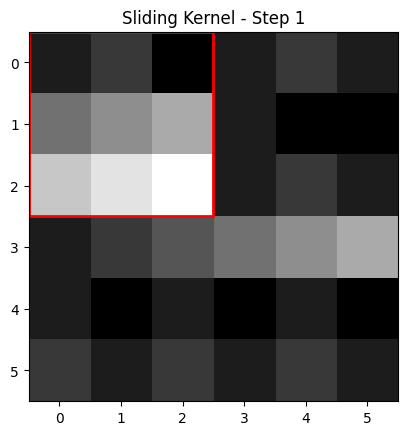

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create a dummy grayscale image (6x6)
image = np.array([
    [1, 2, 0, 1, 2, 1],
    [4, 5, 6, 1, 0, 0],
    [7, 8, 9, 1, 2, 1],
    [1, 2, 3, 4, 5, 6],
    [1, 0, 1, 0, 1, 0],
    [2, 1, 2, 1, 2, 1]
])

# Define 3x3 filter
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    ax.set_title("Sliding Kernel - Step {}".format(frame+1))
    ax.imshow(image, cmap='gray')

    # Show kernel window
    x = frame % 4
    y = frame // 4
    rect = plt.Rectangle((x-0.5, y-0.5), 3, 3, edgecolor='red', facecolor='none', linewidth=2)
    ax.add_patch(rect)

ani = animation.FuncAnimation(fig, update, frames=16, interval=500)

# Save as mp4 or gif
ani.save("cnn_convolution.gif", writer='pillow')
# ani.save("cnn_convolution.mp4", writer='ffmpeg')  # for mp4



In [3]:
ani.save("cnn_convolution.gif", writer='pillow')

None


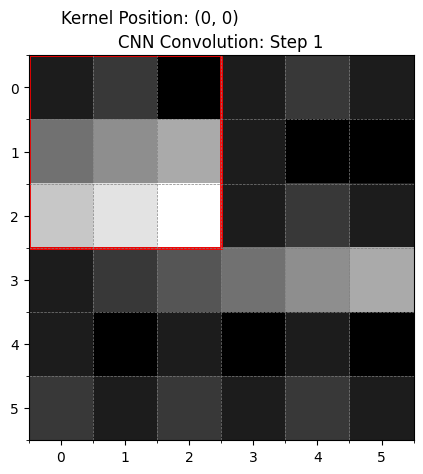

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create a dummy 6x6 grayscale image
image = np.array([
    [1, 2, 0, 1, 2, 1],
    [4, 5, 6, 1, 0, 0],
    [7, 8, 9, 1, 2, 1],
    [1, 2, 3, 4, 5, 6],
    [1, 0, 1, 0, 1, 0],
    [2, 1, 2, 1, 2, 1]
])

# Dimensions
img_h, img_w = image.shape
k_size = 3
stride = 1

# Output size
out_h = (img_h - k_size) // stride + 1
out_w = (img_w - k_size) // stride + 1

# Precompute all top-left corners of the sliding window
positions = [(i, j) for i in range(out_h) for j in range(out_w)]

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 5))

def update(frame):
    ax.clear()
    ax.set_title("CNN Convolution: Step {}".format(frame + 1))
    ax.imshow(image, cmap='gray', vmin=0, vmax=9)

    i, j = positions[frame]
    # Draw red rectangle over current kernel position
    rect = plt.Rectangle((j - 0.5, i - 0.5), k_size, k_size,
                         edgecolor='red', facecolor='none', linewidth=2)
    ax.add_patch(rect)

    # Optional: Show coordinates
    ax.text(0, -1, f"Kernel Position: ({i}, {j})", fontsize=12)

    ax.set_xticks(np.arange(-.5, 6, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 6, 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(positions), interval=600)

# Save animation as a GIF
ani.save("cnn_convolution.gif", writer='pillow')



In [5]:
from google.colab import files
files.download("cnn_convolution.gif")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

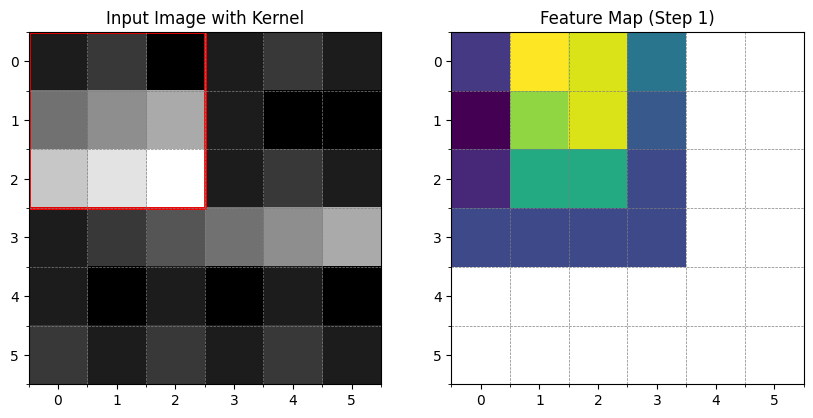

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Dummy input image (6x6)
image = np.array([
    [1, 2, 0, 1, 2, 1],
    [4, 5, 6, 1, 0, 0],
    [7, 8, 9, 1, 2, 1],
    [1, 2, 3, 4, 5, 6],
    [1, 0, 1, 0, 1, 0],
    [2, 1, 2, 1, 2, 1]
])

# 3x3 filter (Sobel-like)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Dimensions
img_h, img_w = image.shape
k_size = 3
stride = 1

# Output shape
out_h = (img_h - k_size) // stride + 1
out_w = (img_w - k_size) // stride + 1
feature_map = np.zeros((out_h, out_w))

# All kernel positions
positions = [(i, j) for i in range(out_h) for j in range(out_w)]

# Set up plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

def update(frame):
    ax1.clear()
    ax2.clear()

    i, j = positions[frame]

    # Display input image and sliding kernel
    ax1.imshow(image, cmap='gray', vmin=0, vmax=9)
    ax1.set_title("Input Image with Kernel")
    rect = plt.Rectangle((j - 0.5, i - 0.5), k_size, k_size, edgecolor='red', facecolor='none', linewidth=2)
    ax1.add_patch(rect)

    # Compute convolution at this location
    patch = image[i:i+k_size, j:j+k_size]
    conv_result = np.sum(patch * kernel)
    feature_map[i, j] = conv_result

    # Display feature map
    ax2.imshow(feature_map, cmap='viridis', vmin=np.min(feature_map), vmax=np.max(feature_map))
    ax2.set_title("Feature Map (Step {})".format(frame + 1))

    # Grid and labels (optional)
    for ax in [ax1, ax2]:
        ax.set_xticks(np.arange(-.5, 6, 1), minor=True)
        ax.set_yticks(np.arange(-.5, 6, 1), minor=True)
        ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5)

# Animate
ani = animation.FuncAnimation(fig, update, frames=len(positions), interval=600)

# Save to GIF
ani.save("cnn_with_feature_map.gif", writer='pillow')


In [7]:
from google.colab import files
files.download("cnn_with_feature_map.gif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

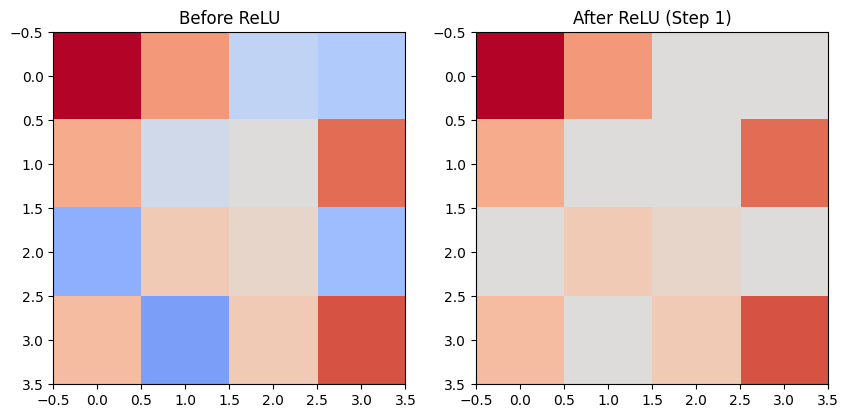

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Use the feature_map from the previous step
feature_map = np.array([
    [10, 5, -2, -3],
    [4, -1, 0, 7],
    [-5, 2, 1, -4],
    [3, -6, 2, 8]
], dtype=float)

relu_map = np.copy(feature_map)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

positions = [(i, j) for i in range(4) for j in range(4)]

def relu_update(frame):
    ax1.clear()
    ax2.clear()

    i, j = positions[frame]
    val = relu_map[i, j]
    relu_map[i, j] = max(0, val)

    # Before ReLU
    ax1.imshow(feature_map, cmap='coolwarm', vmin=-10, vmax=10)
    ax1.set_title("Before ReLU")

    # After ReLU
    ax2.imshow(relu_map, cmap='coolwarm', vmin=-10, vmax=10)
    ax2.set_title("After ReLU (Step {})".format(frame + 1))

    for ax in [ax1, ax2]:
        ax.set_xticks(np.arange(-.5, 4, 1), minor=True)
        ax.set_yticks(np.arange(-.5, 4, 1), minor=True)
        ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5)

ani = animation.FuncAnimation(fig, relu_update, frames=len(positions), interval=500)
ani.save("relu_activation.gif", writer='pillow')


In [9]:
from google.colab import files
files.download("relu_activation.gif")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

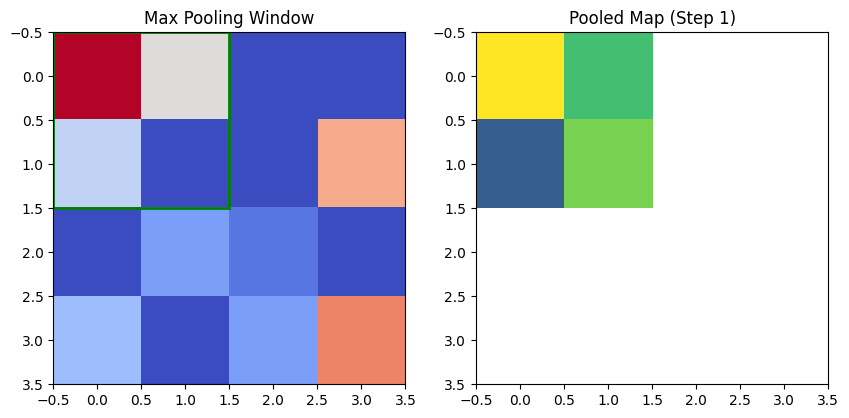

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ReLU output (example)
relu_map = np.array([
    [10, 5,  0,  0],
    [ 4, 0,  0,  7],
    [ 0, 2,  1,  0],
    [ 3, 0,  2,  8]
])

input_h, input_w = relu_map.shape
pool_size = 2
stride = 2

out_h = (input_h - pool_size) // stride + 1
out_w = (input_w - pool_size) // stride + 1

pooled_map = np.zeros((out_h, out_w))

positions = [(i, j) for i in range(0, input_h, stride) for j in range(0, input_w, stride)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

def update_pooling(frame):
    ax1.clear()
    ax2.clear()

    i, j = positions[frame]
    out_i = i // stride
    out_j = j // stride

    patch = relu_map[i:i+pool_size, j:j+pool_size]
    max_val = np.max(patch)
    pooled_map[out_i, out_j] = max_val

    # Show sliding window
    ax1.imshow(relu_map, cmap='coolwarm', vmin=0, vmax=np.max(relu_map))
    rect = plt.Rectangle((j - 0.5, i - 0.5), pool_size, pool_size,
                         edgecolor='green', facecolor='none', linewidth=2)
    ax1.add_patch(rect)
    ax1.set_title("Max Pooling Window")

    # Show pooled output
    ax2.imshow(pooled_map, cmap='viridis', vmin=0, vmax=np.max(relu_map))
    ax2.set_title("Pooled Map (Step {})".format(frame + 1))

    for ax in [ax1, ax2]:
        ax.set_xticks(np.arange(-.5, 4, 1), minor=True)
        ax.set_yticks(np.arange(-.5, 4, 1), minor=True)
        ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5)

ani = animation.FuncAnimation(fig, update_pooling, frames=len(positions), interval=600)
ani.save("max_pooling.gif", writer='pillow')


In [11]:
from google.colab import files
files.download("max_pooling.gif")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

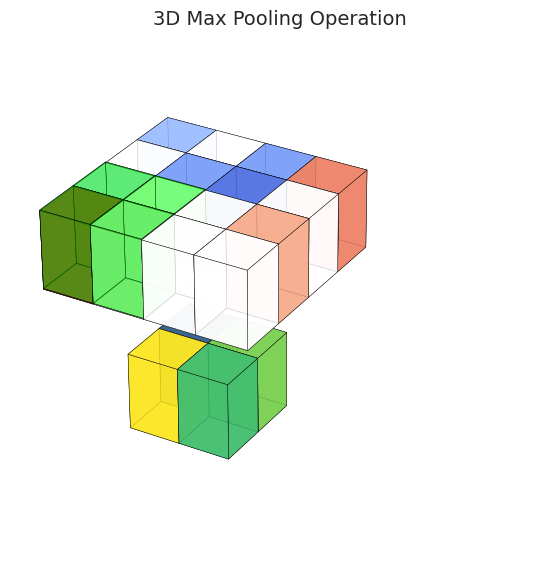

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation

# Input feature map after ReLU
relu_map = np.array([
    [10, 5,  0,  0],
    [ 4, 0,  0,  7],
    [ 0, 2,  1,  0],
    [ 3, 0,  2,  8]
])

pool_size = 2
stride = 2

out_h = relu_map.shape[0] // pool_size
out_w = relu_map.shape[1] // pool_size
pooled_map = np.zeros((out_h, out_w))
positions = [(i, j) for i in range(0, relu_map.shape[0], stride)
                      for j in range(0, relu_map.shape[1], stride)]

# Helper: draw cube at (x, y, z)
def draw_cube(ax, x, y, z, size=1, color='skyblue', alpha=0.8):
    r = [0, size]
    vertices = np.array([
        [[x+r[0], y+r[0], z+r[0]], [x+r[1], y+r[0], z+r[0]], [x+r[1], y+r[1], z+r[0]], [x+r[0], y+r[1], z+r[0]]],
        [[x+r[0], y+r[0], z+r[1]], [x+r[1], y+r[0], z+r[1]], [x+r[1], y+r[1], z+r[1]], [x+r[0], y+r[1], z+r[1]]],
        [[x+r[0], y+r[0], z+r[0]], [x+r[1], y+r[0], z+r[0]], [x+r[1], y+r[0], z+r[1]], [x+r[0], y+r[0], z+r[1]]],
        [[x+r[0], y+r[1], z+r[0]], [x+r[1], y+r[1], z+r[0]], [x+r[1], y+r[1], z+r[1]], [x+r[0], y+r[1], z+r[1]]],
        [[x+r[0], y+r[0], z+r[0]], [x+r[0], y+r[1], z+r[0]], [x+r[0], y+r[1], z+r[1]], [x+r[0], y+r[0], z+r[1]]],
        [[x+r[1], y+r[0], z+r[0]], [x+r[1], y+r[1], z+r[0]], [x+r[1], y+r[1], z+r[1]], [x+r[1], y+r[0], z+r[1]]],
    ])
    ax.add_collection3d(Poly3DCollection(vertices, facecolors=color, linewidths=0.3, edgecolors='black', alpha=alpha))

# Animation
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.clear()
    ax.set_title("3D Max Pooling Operation", fontsize=14)
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    ax.set_zlim(0, 3)
    ax.set_axis_off()

    # Draw input feature map on top layer (z=2)
    for i in range(4):
        for j in range(4):
            color = plt.cm.coolwarm(relu_map[i][j] / 10) if relu_map[i][j] > 0 else "white"
            draw_cube(ax, j, i, 2, color=color)

    # Draw pooling window
    i, j = positions[frame]
    pool = relu_map[i:i+2, j:j+2]
    pooled_val = np.max(pool)
    pooled_map[i//2][j//2] = pooled_val

    # Green transparent overlay showing sliding window
    for pi in range(i, i+2):
        for pj in range(j, j+2):
            draw_cube(ax, pj, pi, 2.01, color='lime', alpha=0.3)

    # Draw pooled output block at lower z=0
    for m in range(out_h):
        for n in range(out_w):
            if pooled_map[m, n] > 0:
                color = plt.cm.viridis(pooled_map[m, n] / 10)
                draw_cube(ax, n+1, m+1, 0, color=color)

ani = animation.FuncAnimation(fig, update, frames=len(positions), interval=1000)
ani.save("3d_max_pooling.gif", writer='pillow')


In [15]:
from google.colab import files
files.download("3d_max_pooling.gif")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

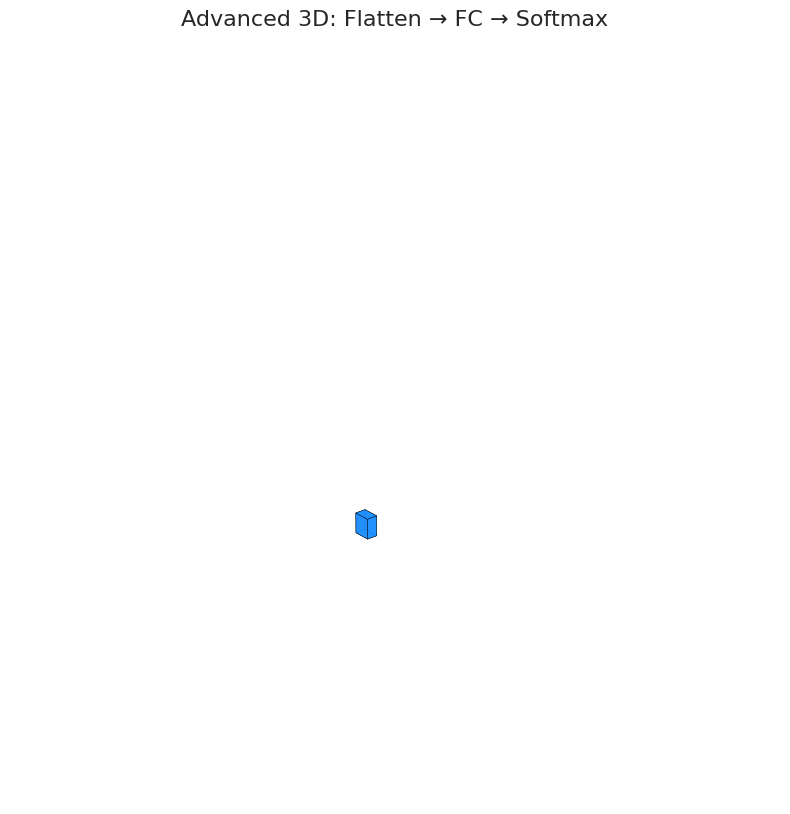

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation

# Drawing 3D cube
def draw_cube(ax, x, y, z, size=1, color='skyblue', alpha=0.9, edge_color='black'):
    r = [0, size]
    vertices = np.array([
        [[x+r[0], y+r[0], z+r[0]], [x+r[1], y+r[0], z+r[0]], [x+r[1], y+r[1], z+r[0]], [x+r[0], y+r[1], z+r[0]]],
        [[x+r[0], y+r[0], z+r[1]], [x+r[1], y+r[0], z+r[1]], [x+r[1], y+r[1], z+r[1]], [x+r[0], y+r[1], z+r[1]]],
        [[x+r[0], y+r[0], z+r[0]], [x+r[1], y+r[0], z+r[0]], [x+r[1], y+r[0], z+r[1]], [x+r[0], y+r[0], z+r[1]]],
        [[x+r[0], y+r[1], z+r[0]], [x+r[1], y+r[1], z+r[0]], [x+r[1], y+r[1], z+r[1]], [x+r[0], y+r[1], z+r[1]]],
        [[x+r[0], y+r[0], z+r[0]], [x+r[0], y+r[1], z+r[0]], [x+r[0], y+r[1], z+r[1]], [x+r[0], y+r[0], z+r[1]]],
        [[x+r[1], y+r[0], z+r[0]], [x+r[1], y+r[1], z+r[0]], [x+r[1], y+r[1], z+r[1]], [x+r[1], y+r[0], z+r[1]]],
    ])
    ax.add_collection3d(Poly3DCollection(vertices, facecolors=color, linewidths=0.3, edgecolors=edge_color, alpha=alpha))

# Drawing 3D sphere (neuron)
def draw_sphere(ax, x, y, z, radius=0.3, color='orange', alpha=1.0):
    u, v = np.mgrid[0:2 * np.pi:18j, 0:np.pi:10j]
    xs = x + radius * np.cos(u) * np.sin(v)
    ys = y + radius * np.sin(u) * np.sin(v)
    zs = z + radius * np.cos(v)
    ax.plot_surface(xs, ys, zs, color=color, alpha=alpha, linewidth=0)

# Data
flatten_vector = np.random.rand(9)
fc_output = np.random.rand(5)
softmax_output = np.exp(fc_output) / np.sum(np.exp(fc_output))

# Plot setup
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.clear()
    ax.set_title("Advanced 3D: Flatten → FC → Softmax", fontsize=16)
    ax.set_xlim(-5, 20)
    ax.set_ylim(-8, 8)
    ax.set_zlim(0, 10)
    ax.view_init(elev=25, azim=230)
    ax.axis('off')

    # Flatten vector – in a circular arc
    for i in range(min(frame + 1, len(flatten_vector))):
        angle = np.pi * i / len(flatten_vector)
        x = 5 * np.cos(angle)
        y = 5 * np.sin(angle)
        draw_cube(ax, x, y, 1.5, size=0.6, color='dodgerblue', alpha=0.9)

    # FC layer – orange spheres + connections
    if frame >= len(flatten_vector):
        for i in range(5):
            angle = np.pi * (i / 6.0)
            x = 8 + 2 * np.cos(angle)
            y = 2 * np.sin(angle)
            draw_sphere(ax, x, y, 4.5, radius=0.5, color='orange')
            for j in range(len(flatten_vector)):
                f_angle = np.pi * j / len(flatten_vector)
                fx = 5 * np.cos(f_angle)
                fy = 5 * np.sin(f_angle)
                ax.plot([fx + 0.3, x], [fy + 0.3, y], [1.8, 4.5], color='gray', alpha=0.15)

    # Softmax bar chart – final output
    if frame >= len(flatten_vector) + 5:
        for i in range(5):
            height = softmax_output[i] * 5
            x = 15
            y = (i - 2) * 1.6
            ax.bar3d(x, y, 0, 0.5, 0.5, height, color='crimson', alpha=0.85)

# Create and save animation
ani = animation.FuncAnimation(fig, update, frames=25, interval=800)
ani.save("advanced_flatten_fc_softmax_3d.gif", writer='pillow')


In [17]:
from google.colab import files
files.download("advanced_flatten_fc_softmax_3d.gif")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
import plotly.express as px
import numpy as np
import pandas as pd

# Example data creation
num_points = 100
x = np.random.rand(num_points)
y = np.random.rand(num_points)
z = np.random.rand(num_points)
time = np.random.randint(1, 10, num_points)  # Example time variable for animation

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y, 'z': z, 'time': time})

# Create the 3D scatter plot
fig = px.scatter_3d(df, x='x', y='y', z='z', animation_frame='time',
                    color='time', size_max=10, range_x=[0, 1],
                    range_y=[0, 1], range_z=[0, 1])

# Customize the plot
fig.update_layout(title='3D Interactive Animation of Random Points',
                  scene=dict(xaxis_title='X Axis',
                             yaxis_title='Y Axis',
                             zaxis_title='Z Axis'))

# Display the animation
fig.show()

In [20]:
import plotly.graph_objects as go
import numpy as np

# Step 1: CNN Structure Setup
input_shape = (6, 6)
conv_shape = (4, 4)
pool_shape = (2, 2)
fc_neurons = 3

# Step 2: Generate Dummy Data
input_data = np.random.rand(*input_shape)
conv_data = np.random.rand(*conv_shape)
pool_data = np.random.rand(*pool_shape)
flatten_data = pool_data.flatten()
fc_output = np.random.rand(fc_neurons)
softmax_output = np.exp(fc_output) / np.sum(np.exp(fc_output))

# Step 3: Helper function to draw 2D layer
def draw_2d_layer(data, offset_x, offset_y, z_level, color, label):
    rows, cols = data.shape
    for i in range(rows):
        for j in range(cols):
            fig.add_trace(go.Mesh3d(
                x=[offset_x+j, offset_x+j+1, offset_x+j+1, offset_x+j],
                y=[offset_y+i, offset_y+i, offset_y+i+1, offset_y+i+1],
                z=[z_level]*4,
                color=color,
                opacity=0.85,
                hovertext=f"{label}[{i},{j}] = {data[i,j]:.2f}",
                hoverinfo="text",
                showscale=False
            ))

# Step 4: Build the Visualization
fig = go.Figure()

# Input Layer
draw_2d_layer(input_data, offset_x=0, offset_y=0, z_level=0, color='lightblue', label='Input')

# Convolution Layer
draw_2d_layer(conv_data, offset_x=8, offset_y=1, z_level=2, color='orange', label='Conv')

# Pooling Layer
draw_2d_layer(pool_data, offset_x=14, offset_y=2, z_level=4, color='lightgreen', label='Pool')

# Flattened Layer
for i, val in enumerate(flatten_data):
    fig.add_trace(go.Scatter3d(
        x=[20 + i], y=[2], z=[5],
        mode='markers+text',
        marker=dict(size=6, color='purple'),
        text=[f"{val:.2f}"],
        name="Flatten"
    ))

# Fully Connected + Softmax Output
for i, val in enumerate(softmax_output):
    fig.add_trace(go.Scatter3d(
        x=[28], y=[i * 1.5], z=[6],
        mode='markers+text',
        marker=dict(size=10, color='crimson'),
        text=[f"{val:.2f}"],
        name="Softmax Output"
    ))

# Step 5: Customize Layout
fig.update_layout(
    title="📊 3D Interactive CNN Visualization (Input → Conv → Pool → Flatten → FC → Softmax)",
    scene=dict(
        xaxis=dict(title='X', showgrid=False),
        yaxis=dict(title='Y', showgrid=False),
        zaxis=dict(title='Z', showgrid=False),
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    showlegend=False
)

# Step 6: Save Interactive Visualization
fig.write_html("interactive_cnn_3d.html")
fig.show()


In [25]:
!apt install libcairo2-dev libpango1.0-dev libgdk-pixbuf2.0-dev libffi-dev shared-mime-info

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-5ubuntu2).
libffi-dev is already the newest version (3.4.2-4).
libffi-dev set to manually installed.
shared-mime-info is already the newest version (2.1-2).
shared-mime-info set to manually installed.
The following additional packages will be installed:
  libdatrie-dev libfribidi-dev libgdk-pixbuf-2.0-dev libgdk-pixbuf-xlib-2.0-0
  libgdk-pixbuf-xlib-2.0-dev libgdk-pixbuf2.0-bin libgraphite2-dev libharfbuzz-dev
  libharfbuzz-gobject0 libharfbuzz-icu0 libthai-dev pango1.0-tools
Suggested packages:
  libdatrie-doc libgraphite2-utils libpango1.0-doc libthai-doc graphicsmagick
The following NEW packages will be installed:
  libdatrie-dev libfribidi-dev libgdk-pixbuf-2.0-dev libgdk-pixbuf-xlib-2.0-0
  libgdk-pixbuf-xlib-2.0-dev libgdk-pixbuf2.0-bin libgdk-pixbuf2.0-dev libgraphite2-dev
  libharfbuzz-dev libharfbuzz-gobject0 libharfbuzz-icu0 lib

In [27]:
!pip install manim --upgrade

  Using cached manim-0.19.0-py3-none-any.whl.metadata (11 kB)
  Using cached av-13.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached cloup-3.0.7-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached isosurfaces-0.1.2-py3-none-any.whl.metadata (3.3 kB)
  Using cached manimpango-0.6.0.tar.gz (4.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 625.9/625.9 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.0 MB/s eta 0:00:00


In [32]:
%%writefile cnn_animation.py
from manim import *

class CNNModel(Scene):
    def construct(self):
        input_image = Square(side_length=2).set_fill(BLUE, opacity=0.5)
        input_label = Text("Input Image", font_size=24).next_to(input_image, DOWN)

        self.play(FadeIn(input_image), Write(input_label))

        conv_layer = Square(side_length=1.5).set_fill(ORANGE, opacity=0.6)
        conv_layer.next_to(input_image, RIGHT, buff=1)
        conv_label = Text("Convolution", font_size=24).next_to(conv_layer, DOWN)

        self.play(FadeIn(conv_layer), Write(conv_label))

        pool = Square(side_length=1).set_fill(GREEN, opacity=0.6)
        pool.next_to(conv_layer, RIGHT, buff=1)
        pool_label = Text("Max Pooling", font_size=24).next_to(pool, DOWN)

        self.play(FadeIn(pool), Write(pool_label))

        flatten = Rectangle(width=3, height=0.3).set_fill(PURPLE, opacity=0.6)
        flatten.next_to(pool, RIGHT, buff=1)
        flat_label = Text("Flatten", font_size=24).next_to(flatten, DOWN)

        self.play(FadeIn(flatten), Write(flat_label))

        fc_neurons = VGroup(*[Circle(radius=0.2).set_fill(RED, opacity=0.7) for _ in range(5)])
        fc_neurons.arrange(DOWN, buff=0.2)
        fc_neurons.next_to(flatten, RIGHT, buff=1)
        fc_label = Text("Fully Connected", font_size=24).next_to(fc_neurons, RIGHT)

        self.play(FadeIn(fc_neurons), Write(fc_label))

        outputs = VGroup(*[Rectangle(height=0.3 + i*0.1, width=0.5).set_fill(YELLOW, opacity=0.8) for i in range(1, 4)])
        outputs.arrange(DOWN, buff=0.3)
        outputs.next_to(fc_neurons, RIGHT, buff=1)
        output_label = Text("Softmax Output", font_size=24).next_to(outputs, RIGHT)

        self.play(FadeIn(outputs), Write(output_label))

        self.wait(1)
        flow_arrows = [
            Arrow(input_image.get_right(), conv_layer.get_left()),
            Arrow(conv_layer.get_right(), pool.get_left()),
            Arrow(pool.get_right(), flatten.get_left()),
            Arrow(flatten.get_right(), fc_neurons.get_left()),
            Arrow(fc_neurons.get_right(), outputs.get_left()),
        ]
        self.play(*[GrowArrow(a) for a in flow_arrows])
        self.wait(2)


Writing cnn_animation.py


In [34]:
!manim -pql cnn_animation.py CNNModel


Manim Community v0.19.0

[04/07/25 19:03:36] INFO     Animation 0 : Partial movie file written in    ]8;id=278223;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=951036;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/cnn_animation/480p15/pa                         
                             rtial_movie_files/CNNModel/1185818338_99138773                         
                             6_223132457.mp4'                                                       
[04/07/25 19:03:37] INFO     Animation 1 : Partial movie file written in    ]8;id=310031;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=77678;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/cnn

In [35]:
!manim -pql cnn_animation.py CNNModel


Manim Community v0.19.0

[04/07/25 19:04:23] INFO     Animation 0 : Using cached data (hash :            ]8;id=978762;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=82475;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             1185818338_991387736_223132457)                                        
                    INFO     Animation 1 : Using cached data (hash :            ]8;id=885117;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=497577;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             624642324_4039283133_2206514116)                                       
[04/07/25 19:04:24] INFO     Animation 2 : Using cached data (hash :            ]8;id=84778;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cai

In [36]:
from IPython.display import HTML
from base64 import b64encode

video_path = "/content/media/videos/cnn_animation/480p15/CNNModel.mp4"
mp4 = open(video_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width=640 controls><source src="{data_url}" type="video/mp4"></video>')


In [38]:
%%writefile cnn_detailed.py
from manim import *

class CNNDetailed(Scene):
    def construct(self):
        # Step 1: Input Image Grid
        image_grid = VGroup()
        size = 5
        for i in range(size):
            for j in range(size):
                square = Square(side_length=0.5)
                square.move_to(np.array([j * 0.5, -i * 0.5, 0]))
                square.set_fill(BLUE, opacity=0.2 + 0.1 * ((i + j) % 3))
                square.set_stroke(WHITE, width=1)
                image_grid.add(square)
        image_grid.move_to(LEFT * 5)
        label = Text("Input Image", font_size=28).next_to(image_grid, DOWN)

        self.play(FadeIn(image_grid), Write(label))

        # Step 2: Convolution Filter Slide Animation
        filter_box = VGroup(*[Square(0.5).set_stroke(ORANGE, 2) for _ in range(9)])
        for i, square in enumerate(filter_box):
            x = i % 3
            y = i // 3
            square.move_to(np.array([x * 0.5, -y * 0.5, 0]))
        filter_box.move_to(image_grid[0].get_center())
        self.play(Create(filter_box))

        # Animate sliding
        for i in range(3):
            for j in range(3):
                target_index = i * size + j
                if target_index < len(image_grid):
                    self.play(filter_box.animate.move_to(image_grid[target_index].get_center()), run_time=0.3)

        self.wait(1)


Writing cnn_detailed.py


In [39]:
!manim -pql cnn_detailed.py CNNDetailed


Manim Community v0.19.0

[04/07/25 19:07:06] INFO     Animation 0 : Partial movie file written in    ]8;id=624368;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=240080;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/cnn_detailed/480p15/par                         
                             tial_movie_files/CNNDetailed/1185818338_336004                         
                             3369_223132457.mp4'                                                    
                    INFO     Animation 1 : Partial movie file written in    ]8;id=202063;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=569110;file:///usr/local/lib/python3.11/dist-packages/manim/scene/scene_file_writer.py#588\588]8;;\
                             '/content/media/videos/cn

In [40]:
from google.colab import files
files.download("/content/media/videos/cnn_detailed/480p15/CNNDetailed.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
%%writefile cnn_detailed.py
from manim import *

class CNNFullPipeline(Scene):
    def construct(self):
        # 1. Input Image Grid
        size = 5
        image_grid = VGroup()
        for i in range(size):
            for j in range(size):
                sq = Square(0.5)
                sq.move_to(np.array([j * 0.5, -i * 0.5, 0]))
                sq.set_fill(BLUE, opacity=0.2 + 0.1 * ((i + j) % 3))
                sq.set_stroke(WHITE, width=1)
                image_grid.add(sq)
        image_grid.move_to(LEFT * 5 + UP)

        input_label = Text("Input Image", font_size=28).next_to(image_grid, DOWN)
        self.play(FadeIn(image_grid), Write(input_label))

        # 2. Convolution Filter
        filter_box = VGroup(*[Square(0.5).set_stroke(ORANGE, 2) for _ in range(9)])
        for idx, sq in enumerate(filter_box):
            x = idx % 3
            y = idx // 3
            sq.move_to(np.array([x * 0.5, -y * 0.5, 0]))
        filter_box.move_to(image_grid[0].get_center())
        self.play(Create(filter_box))

        # Slide over image
        for i in range(3):
            for j in range(3):
                idx = i * size + j
                if idx < len(image_grid):
                    self.play(filter_box.animate.move_to(image_grid[idx].get_center()), run_time=0.3)

        # 3. Max Pooling
        pool_label = Text("Max Pooling", font_size=28)
        pool_grid = VGroup()
        for i in range(2):
            for j in range(2):
                sq = Square(0.5)
                sq.set_fill(GREEN, opacity=0.4)
                sq.set_stroke(WHITE, width=1)
                sq.move_to(np.array([j * 0.6, -i * 0.6, 0]))
                pool_grid.add(sq)
        pool_group = VGroup(pool_label, pool_grid).arrange(DOWN).move_to(RIGHT * 2 + UP)

        self.play(FadeOut(filter_box), FadeIn(pool_grid), Write(pool_label))

        # Animate selection
        for sq in pool_grid:
            sq.set_fill(YELLOW, opacity=0.6)
            self.wait(0.2)
            sq.set_fill(GREEN, opacity=0.4)

        # 4. Flattening
        flat_rects = VGroup()
        for i in range(4):
            rect = Rectangle(width=0.4, height=0.4)
            rect.set_fill(PURPLE, opacity=0.5)
            rect.set_stroke(WHITE, width=1)
            rect.move_to(np.array([i * 0.5, 0, 0]))
            flat_rects.add(rect)
        flat_rects.move_to(DOWN * 2.5 + LEFT * 2)
        flat_label = Text("Flatten", font_size=28).next_to(flat_rects, DOWN)
        self.play(Transform(pool_grid, flat_rects), Write(flat_label))

        # 5. Fully Connected Layer
        fc_neurons = VGroup()
        for i in range(4):
            neuron = Circle(radius=0.2, color=WHITE)
            neuron.set_fill(RED, opacity=0.4)
            neuron.move_to(UP * (1.2 - i * 0.8) + RIGHT * 2.5)
            fc_neurons.add(neuron)

        self.play(FadeIn(fc_neurons))

        # Connect lines
        lines = VGroup()
        for src in flat_rects:
            for dst in fc_neurons:
                line = Line(src.get_center(), dst.get_center(), stroke_width=1.5, color=GRAY)
                lines.add(line)
        self.play(Create(lines))

        fc_label = Text("Fully Connected Layer", font_size=28).next_to(fc_neurons, RIGHT)
        self.play(Write(fc_label))

        # 6. Softmax Output
        probs = [0.1, 0.3, 0.2, 0.4]
        bar_chart = VGroup()
        for i, val in enumerate(probs):
            bar = Rectangle(width=0.3, height=val * 3, fill_opacity=0.8, fill_color=BLUE)
            bar.move_to(np.array([i * 0.5, -1 + val * 1.5, 0]) + RIGHT * 5)
            bar_chart.add(bar)

        bar_label = Text("Softmax Output", font_size=20).next_to(bar_chart, UP)
        self.play(FadeIn(bar_chart), Write(bar_label))

        self.wait(5)


Overwriting cnn_detailed.py


In [50]:
!manim -pqh cnn_detailed.py CNNFullPipeline


Manim Community v0.19.0

[04/07/25 19:13:06] INFO     Animation 0 : Using cached data (hash :            ]8;id=570200;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=2581;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             3529212410_873814552_223132457)                                        
                    INFO     Animation 1 : Using cached data (hash :            ]8;id=712325;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=998404;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             3040924799_3727923298_710777946)                                       
[04/07/25 19:13:07] INFO     Animation 2 : Using cached data (hash :            ]8;id=994986;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cai

In [51]:
from google.colab import files
files.download("/content/media/videos/cnn_detailed/1080p60/CNNFullPipeline.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
from manim import *

class CNNVisualized(ThreeDScene):
    def construct(self):

        # Input Image Grid
        input_grid = VGroup()
        for i in range(5):
            for j in range(5):
                square = Square(side_length=0.4).set_fill(BLUE, opacity=0.3).set_stroke(WHITE, width=1)
                square.move_to(np.array([j * 0.45, -i * 0.45, 0]))
                input_grid.add(square)
        input_grid.move_to(LEFT * 5 + UP * 2)
        input_label = Text("Input Image", font_size=28).next_to(input_grid, DOWN)

        # Convolutional Layer
        conv_layer = VGroup()
        for d in range(3):
            conv_feature = input_grid.copy().set_fill(ORANGE, opacity=0.3)
            conv_feature.scale(0.8)
            conv_feature.shift(RIGHT * (2.5 + d * 0.8) + OUT * d * 0.2)
            conv_layer.add(conv_feature)
        conv_layer.move_to(RIGHT * 0.5 + UP * 1)
        conv_label = Text("Convolutional Layers", font_size=28).next_to(conv_layer, DOWN)

        # Pooling Layer
        pooling_layer = VGroup()
        for d in range(3):
            pool = VGroup()
            for i in range(3):
                for j in range(3):
                    square = Square(side_length=0.35).set_fill(GREEN, opacity=0.4).set_stroke(WHITE, width=1)
                    square.move_to(np.array([j * 0.4, -i * 0.4, 0]))
                    pool.add(square)
            pool.shift(RIGHT * (5 + d * 0.6) + OUT * d * 0.2)
            pooling_layer.add(pool)
        pooling_layer.move_to(RIGHT * 4.5 + UP * 0.5)
        pool_label = Text("Max Pooling", font_size=28).next_to(pooling_layer, DOWN)

        # Flatten Layer
        flatten_layer = VGroup()
        for i in range(12):
            rect = Rectangle(width=0.3, height=0.3).set_fill(PURPLE, opacity=0.6).set_stroke(WHITE, width=1)
            rect.move_to(np.array([i * 0.35, 0, 0]))
            flatten_layer.add(rect)
        flatten_layer.move_to(DOWN * 1.5 + LEFT * 2.5)
        flat_label = Text("Flatten", font_size=28).next_to(flatten_layer, DOWN)

        # Fully Connected Layer
        fc_layer = VGroup()
        for i in range(5):
            circle = Circle(radius=0.25).set_fill(RED, opacity=0.5).set_stroke(WHITE, width=1)
            circle.move_to(np.array([i * 0.6 - 1.2, -3.5, 0]))
            fc_layer.add(circle)
        fc_layer.move_to(DOWN * 2.5 + LEFT * 0.5)
        fc_label = Text("Fully Connected Layer", font_size=28).next_to(fc_layer, DOWN)

        # Output Probabilities (Softmax)
        softmax = VGroup()
        probs = [0.1, 0.25, 0.3, 0.2, 0.15]
        for i, p in enumerate(probs):
            bar = Rectangle(width=0.3, height=p * 3, fill_opacity=0.8, fill_color=BLUE)
            bar.move_to(np.array([i * 0.4 - 1, -6 + p * 1.5, 0]))
            softmax.add(bar)
        softmax.move_to(DOWN * 3.5 + RIGHT * 2.5)
        softmax_label = Text("Softmax Output", font_size=28).next_to(softmax, DOWN)

        # Play Animation
        self.play(FadeIn(input_grid), Write(input_label))
        self.wait(1)
        self.play(FadeIn(conv_layer), Write(conv_label))
        self.wait(1)
        self.play(FadeIn(pooling_layer), Write(pool_label))
        self.wait(1)
        self.play(FadeIn(flatten_layer), Write(flat_label))
        self.wait(1)
        self.play(FadeIn(fc_layer), Write(fc_label))
        self.wait(1)
        self.play(FadeIn(softmax), Write(softmax_label))
        self.wait(3)


In [59]:
!manim -qh cnn_detailed.py CNNVisualized


Manim Community v0.19.0

[04/07/25 19:24:59] INFO     Animation 0 : Using cached data (hash :            ]8;id=291863;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=767717;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             3272876394_1180819406_223132457)                                       
                    INFO     Animation 1 : Using cached data (hash :            ]8;id=528619;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=715221;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             734416844_2631580503_1792956143)                                       
[04/07/25 19:25:00] INFO     Animation 2 : Using cached data (hash :            ]8;id=376318;file:///usr/local/lib/python3.11/dist-packages/manim/renderer/c

In [62]:
from google.colab import files
files.download("/content/media/videos/cnn_detailed/1080p60/CNNVisualized.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>